**AML Assignment 3**


**QUESTION 1-A**




In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Load training and test data from files
x_train = np.loadtxt('/gisette_train.data')
y_train = np.loadtxt('/gisette_train.labels')
x_test = np.loadtxt('/gisette_valid.data')
y_test = np.loadtxt('/gisette_valid.labels')

## Replacing the 1 values with 0.a
for i in range(y_train.shape[0]):
    if (y_train[i] == -1):
        y_train[i] = 0
print(y_train)
for i in range(y_test.shape[0]):
    if( y_test[i] == -1):
        y_test[i] = 0

# Import necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc

# Normalize the data (zero mean and unit variance) using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Add a column of ones to the training and test data for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Initialize parameters
num_iterations = 300
lambda_value = 0.0001
n_samples, n_features = X_train.shape

# Initialize weights
w = np.zeros(n_features)

# Initialize arrays to store Log-Likelihood, misclassification errors,
# and ROC data
log_likelihoods = []
train_errors = []
test_errors = []
training_loss=[]

fpr_train, tpr_train, auc_train = [], [],[]
fpr_test, tpr_test, auc_test = [], [], []


[1. 0. 1. ... 0. 0. 0.]


<ipython-input-2-3b240d96350c>:13: RuntimeWarning: divide by zero encountered in log
  loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / N + lambda_val * np.dot(w.T, w)
<ipython-input-2-3b240d96350c>:13: RuntimeWarning: invalid value encountered in multiply
  loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / N + lambda_val * np.dot(w.T, w)


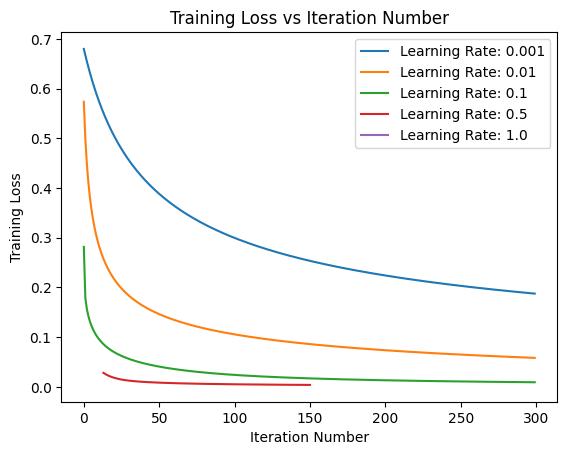

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def loss_function(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / N + lambda_val * np.dot(w.T, w)
    return loss

# Gradient of the Loss function
def gradient(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    grad = np.dot(X.T, (y_pred - y)) / N + 2 * lambda_val * w
    return grad

# Gradient descent
def gradient_descent(X, y, w_init, lambda_val, eta, num_iterations):
    w = w_init
    losses = []
    for i in range(num_iterations):
        grad = gradient(X, y, w, lambda_val)
        w = w - eta * grad
        loss = loss_function(X, y, w, lambda_val)
        losses.append(loss)
    return w, losses

# Set regularization parameter
lambda_val = 0.0001
# List of Learning rates to explore
eta = [0.001, 0.01, 0.1, 0.5, 1.0]

num_iterations = 300

# Initialize w(0) to zero
w_init = np.zeros(X_train.shape[1])

# Perform gradient descent for each Learning rate and plot the training Loss
for i in eta:
  w_trained, losses= gradient_descent(X_train, y_train, w_init,lambda_val, i, num_iterations)
  plt.plot(losses, label=f"Learning Rate: {i}")

plt.title("Training Loss vs Iteration Number")
plt.xlabel("Iteration Number")

plt.ylabel("Training Loss")
plt.legend()

plt.show()



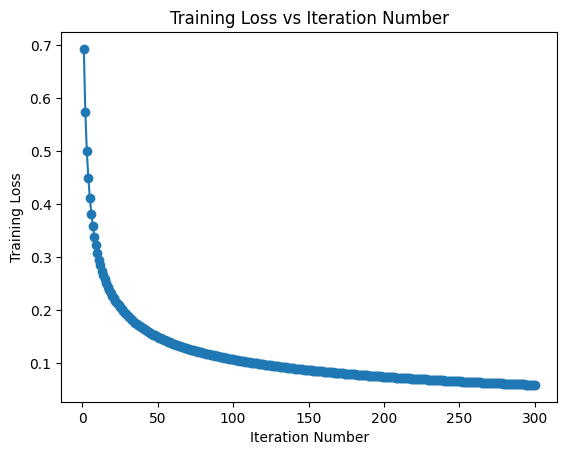

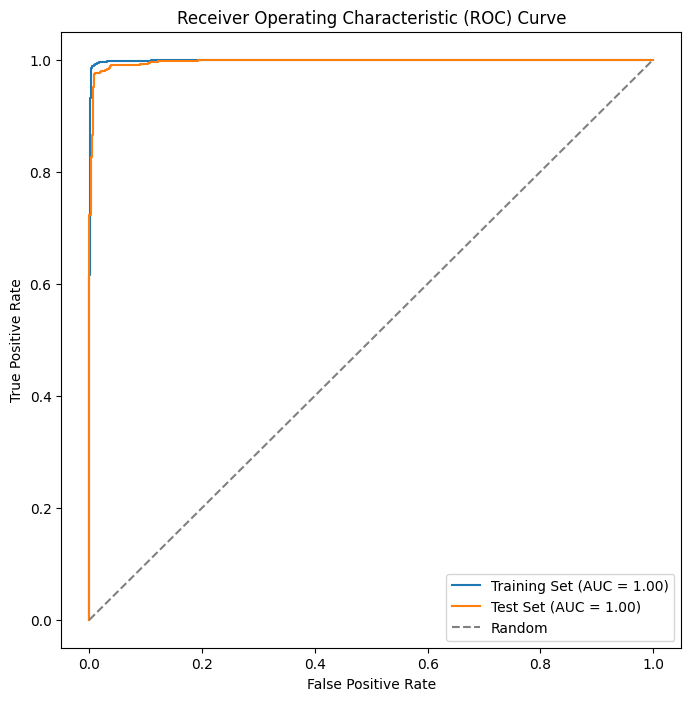

Training Misclassification Error: 0.0093
Test Misclassification Error: 0.0200


In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc

import matplotlib.pyplot as plt

# Initialize parameters
w = np.zeros(X_train.shape[1]) # Initial weights

lambda_value = 0.0001

eta = 0.01

# Train Logistic regressor using gradient descent

iterations = 300

training_loss_history = []

for iteration in range(iterations):
  z = X_train.dot(w)
  h = 1 / (1 + np.exp(-z))
  gradient = np.dot(X_train.T, (y_train-h))/len(y_train)
  w = w - (eta)* lambda_value * w +(eta* gradient)
  loss = -np.sum(y_train * np.log(h) + (1-y_train)*np.log(1-h)) /len(y_train) + lambda_value *np.dot(w.T,w)
  training_loss_history.append(loss)

# Plot training Loss vs iteration number
plt.plot(range(1, iterations + 1), training_loss_history, marker='o')

plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')

plt.title('Training Loss vs Iteration Number')
plt.show()

# Evaluate on training set
y_train_pred = (X_train.dot(w) >= 0).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_misclassification_error = 1 - train_accuracy

# Evaluate on test set
y_test_pred = (X_test.dot(w) >= 0).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_misclassification_error = 1 - test_accuracy

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, h)
fpr_test, tpr_test, _ = roc_curve(y_test, X_test.dot(w))

plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc(fpr_train, tpr_train):.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc(fpr_test, tpr_test):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report results
print(f"Training Misclassification Error: {train_misclassification_error:.4f}")
print(f"Test Misclassification Error: {test_misclassification_error:.4f}")






**QUESTION 1-B**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

# Load training and test data from files
x_train = np.loadtxt('/madelon_train.data')
y_train = np.loadtxt('/madelon_train.labels')
x_test = np.loadtxt('/madelon_valid.data')
y_test = np.loadtxt('/madelon_valid.labels')

## Replacing the 1 values with 0.
for i in range(y_train.shape[0]):
    if (y_train[i] == -1):
        y_train[i] = 0
print(y_train)
for i in range(y_test.shape[0]):
    if( y_test[i] == -1):
        y_test[i] = 0

# Import necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_curve, auc

# Normalize the data (zero mean and unit variance) using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
# Add a column of ones to the training and test data for the bias term
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Initialize parameters
num_iterations = 300
lambda_value = 0.0001
n_samples, n_features = X_train.shape

# Initialize weights
w = np.zeros(n_features)

# Initialize arrays to store Log-Likelihood, misclassification errors,
# and ROC data
log_likelihoods = []
train_errors = []
test_errors = []
training_loss=[]

fpr_train, tpr_train, auc_train = [], [],[]
fpr_test, tpr_test, auc_test = [], [], []







































































[0. 0. 0. ... 0. 1. 1.]


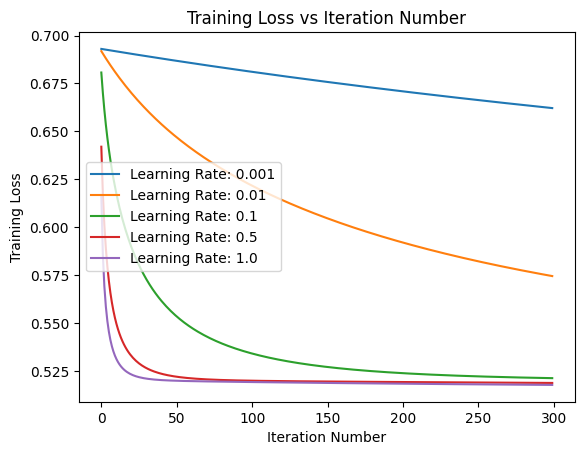

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def loss_function(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / N + lambda_val * np.dot(w.T, w)
    return loss

# Gradient of the Loss function
def gradient(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    grad = np.dot(X.T, (y_pred - y)) / N + 2 * lambda_val * w
    return grad

# Gradient descent
def gradient_descent(X, y, w_init, lambda_val, eta, num_iterations):
    w = w_init
    losses = []
    for i in range(num_iterations):
        grad = gradient(X, y, w, lambda_val)
        w = w - eta * grad
        loss = loss_function(X, y, w, lambda_val)
        losses.append(loss)
    return w, losses

# Set regularization parameter
lambda_val = 0.0001
# List of Learning rates to explore
eta = [0.001, 0.01, 0.1, 0.5, 1.0]

num_iterations = 300

# Initialize w(0) to zero
w_init = np.zeros(X_train.shape[1])

# Perform gradient descent for each Learning rate and plot the training Loss
for i in eta:
  w_trained, losses= gradient_descent(X_train, y_train, w_init,lambda_val, i, num_iterations)
  plt.plot(losses, label=f"Learning Rate: {i}")

plt.title("Training Loss vs Iteration Number")
plt.xlabel("Iteration Number")

plt.ylabel("Training Loss")
plt.legend()

plt.show()



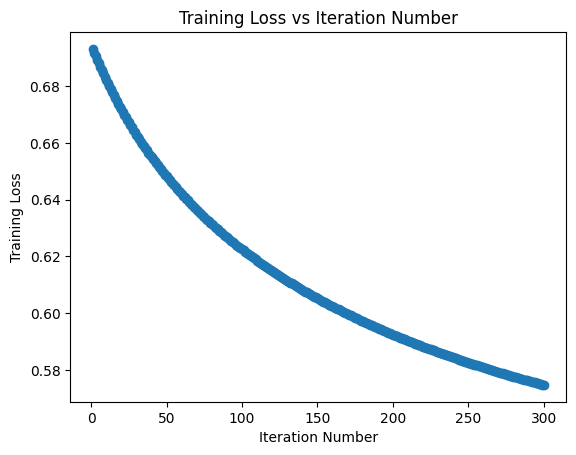

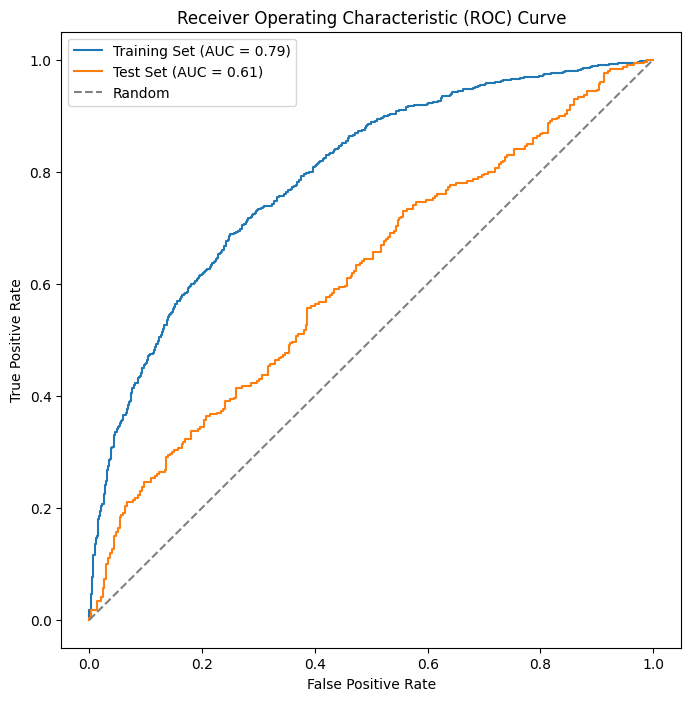

Training Misclassification Error: 0.2830
Test Misclassification Error: 0.4183


In [ ]:
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc

import matplotlib.pyplot as plt

# Initialize parameters
w = np.zeros(X_train.shape[1]) # Initial weights

lambda_value = 0.0001

eta = 0.01

# Train Logistic regressor using gradient descent

iterations = 300

training_loss_history = []

for iteration in range(iterations):
  z = X_train.dot(w)
  h = 1 / (1 + np.exp(-z))
  gradient = np.dot(X_train.T, (y_train-h))/len(y_train)
  w = w - (eta)* lambda_value * w +(eta* gradient)
  loss = -np.sum(y_train * np.log(h) + (1-y_train)*np.log(1-h)) /len(y_train) + lambda_value *np.dot(w.T,w)
  training_loss_history.append(loss)

# Plot training Loss vs iteration number
plt.plot(range(1, iterations + 1), training_loss_history, marker='o')

plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')

plt.title('Training Loss vs Iteration Number')
plt.show()

# Evaluate on training set
y_train_pred = (X_train.dot(w) >= 0).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_misclassification_error = 1 - train_accuracy

# Evaluate on test set
y_test_pred = (X_test.dot(w) >= 0).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_misclassification_error = 1 - test_accuracy

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, h)
fpr_test, tpr_test, _ = roc_curve(y_test, X_test.dot(w))

plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc(fpr_train, tpr_train):.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc(fpr_test, tpr_test):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report results
print(f"Training Misclassification Error: {train_misclassification_error:.4f}")
print(f"Test Misclassification Error: {test_misclassification_error:.4f}")






**QUESTION 1-C**

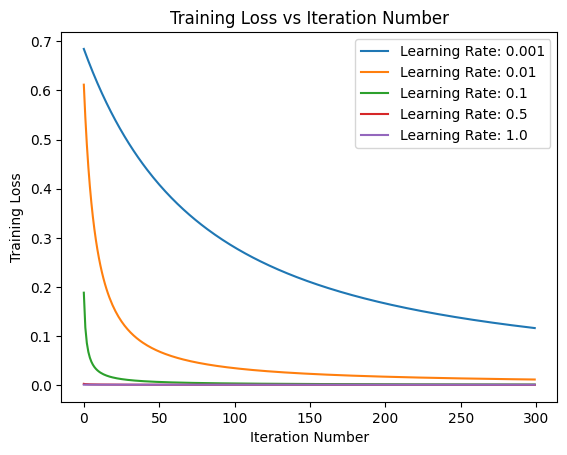

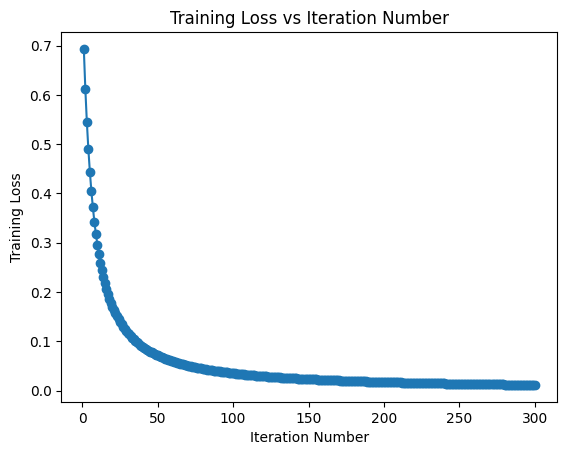

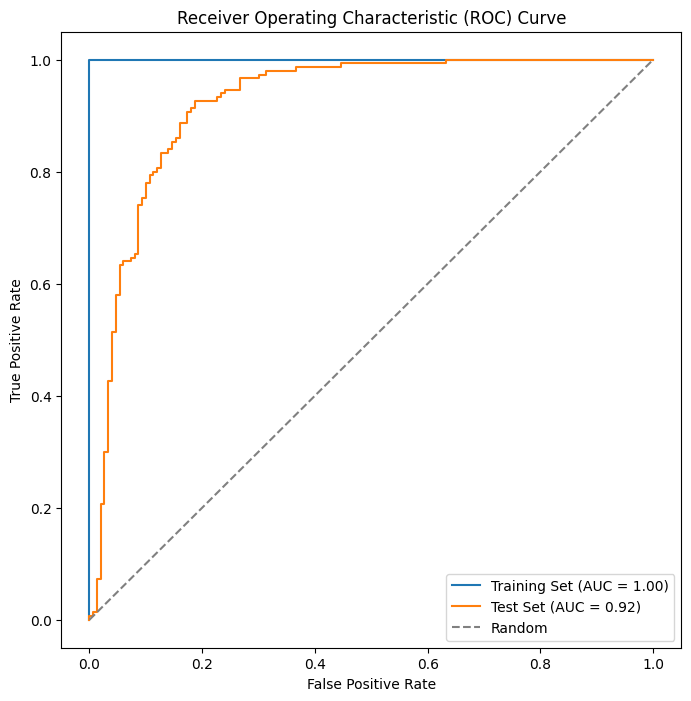

Training Misclassification Error: 0.0000
Test Misclassification Error: 0.1400


In [ ]:
X_train = np.genfromtxt("/dexter_train.csv", delimiter=',')
X_test = np.genfromtxt("/dexter_valid.csv", delimiter=',')

# Load Labels from ".Labels" files
y_train = np.loadtxt("/dexter_train.labels")
y_test = np.loadtxt("/dexter_valid.labels")
import numpy as np

# Preprocess the data
for i in range(y_train.shape[0]):
    if y_train[i] == -1:
        y_train[i] = 0

for i in range(y_test.shape[0]):
    if y_test[i] == -1:
        y_test[i] = 0

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Add a column of ones to the data
X_train = np.column_stack((np.ones(X_train.shape[0]), X_train))
X_test = np.column_stack((np.ones(X_test.shape[0]), X_test))

# Convert data types to float64
X_train = X_train.astype(np.float64)
X_test = X_test.astype(np.float64)

# Initialize parameters
num_iterations = 300
lambda_value = 0.0001
n_samples, n_features = X_train.shape

# Initialize weights
w = np.zeros(n_features)

# Initialize arrays to store results
log_likelihoods = []
train_errors = []
test_errors = []
training_loss = []
fpr_train, tpr_train, auc_train = [], [], []
fpr_test, tpr_test, auc_test = [], [], []
import numpy as np
import matplotlib.pyplot as plt

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Loss function
def loss_function(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    loss = -np.sum(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred)) / N + lambda_val * np.dot(w.T, w)
    return loss

# Gradient of the Loss function
def gradient(X, y, w, lambda_val):
    N = len(X)
    z = np.dot(X, w)
    y_pred = sigmoid(z)
    grad = np.dot(X.T, (y_pred - y)) / N + 2 * lambda_val * w
    return grad

# Gradient descent
def gradient_descent(X, y, w_init, lambda_val, eta, num_iterations):
    w = w_init
    losses = []
    for i in range(num_iterations):
        grad = gradient(X, y, w, lambda_val)
        w = w - eta * grad
        loss = loss_function(X, y, w, lambda_val)
        losses.append(loss)
    return w, losses

# Set regularization parameter
lambda_val = 0.0001
# List of Learning rates to explore
eta = [0.001, 0.01, 0.1, 0.5, 1.0]

num_iterations = 300

# Initialize w(0) to zero
w_init = np.zeros(X_train.shape[1])

# Perform gradient descent for each Learning rate and plot the training Loss
for i in eta:
  w_trained, losses= gradient_descent(X_train, y_train, w_init,lambda_val, i, num_iterations)
  plt.plot(losses, label=f"Learning Rate: {i}")

plt.title("Training Loss vs Iteration Number")
plt.xlabel("Iteration Number")

plt.ylabel("Training Loss")
plt.legend()

plt.show()
import numpy as np

from sklearn.datasets import fetch_openml

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import log_loss, accuracy_score, roc_curve, auc

import matplotlib.pyplot as plt

# Initialize parameters
w = np.zeros(X_train.shape[1]) # Initial weights

lambda_value = 0.0001

eta = 0.01

# Train Logistic regressor using gradient descent

iterations = 300

training_loss_history = []

for iteration in range(iterations):
  z = X_train.dot(w)
  h = 1 / (1 + np.exp(-z))
  gradient = np.dot(X_train.T, (y_train-h))/len(y_train)
  w = w - (eta)* lambda_value * w +(eta* gradient)
  loss = -np.sum(y_train * np.log(h) + (1-y_train)*np.log(1-h)) /len(y_train) + lambda_value *np.dot(w.T,w)
  training_loss_history.append(loss)

# Plot training Loss vs iteration number
plt.plot(range(1, iterations + 1), training_loss_history, marker='o')

plt.xlabel('Iteration Number')
plt.ylabel('Training Loss')

plt.title('Training Loss vs Iteration Number')
plt.show()

# Evaluate on training set
y_train_pred = (X_train.dot(w) >= 0).astype(int)

train_accuracy = accuracy_score(y_train, y_train_pred)
train_misclassification_error = 1 - train_accuracy

# Evaluate on test set
y_test_pred = (X_test.dot(w) >= 0).astype(int)

test_accuracy = accuracy_score(y_test, y_test_pred)
test_misclassification_error = 1 - test_accuracy

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, h)
fpr_test, tpr_test, _ = roc_curve(y_test, X_test.dot(w))

plt.figure(figsize=(8, 8))
plt.plot(fpr_train, tpr_train, label=f'Training Set (AUC = {auc(fpr_train, tpr_train):.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test Set (AUC = {auc(fpr_test, tpr_test):.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Report results
print(f"Training Misclassification Error: {train_misclassification_error:.4f}")
print(f"Test Misclassification Error: {test_misclassification_error:.4f}")








QUESTION 2

**QUESTION 2-A**

In [ ]:
# Augment the training and test data with a column of ones for w0
X_train_augmented = np.c_[np.ones(len(y_train)), X_train]
X_test_augmented = np.c_[np.ones(len(y_test)), X_test]

# Set lambda value
lambda_value = 8.80e1

# Analytical solution for w and w0
w = np.linalg.inv(X_train_augmented.T @ X_train_augmented + lambda_value *
                  np.identity(X_train_augmented.shape[1])) @ X_train_augmented.T @ y_train
w0 = np.mean(y_train - X_train_augmented @ w)

# Make predictions on training and test sets
y_train_pred = np.sign(X_train_augmented @ w + w0)
y_test_pred = np.sign(X_test_augmented @ w + w0)

# Calculate misclassification error
train_error = np.mean(y_train != y_train_pred)
test_error = np.mean(y_test != y_test_pred)

# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)

print("Misclassification Errors:")
print(f"Train Error\tTest Error")
print(f"{train_error:.4f}\t{test_error:.4f}")

Misclassification Errors:
Train Error	Test Error
0.0000	0.0920


**QUESTION 2-B**

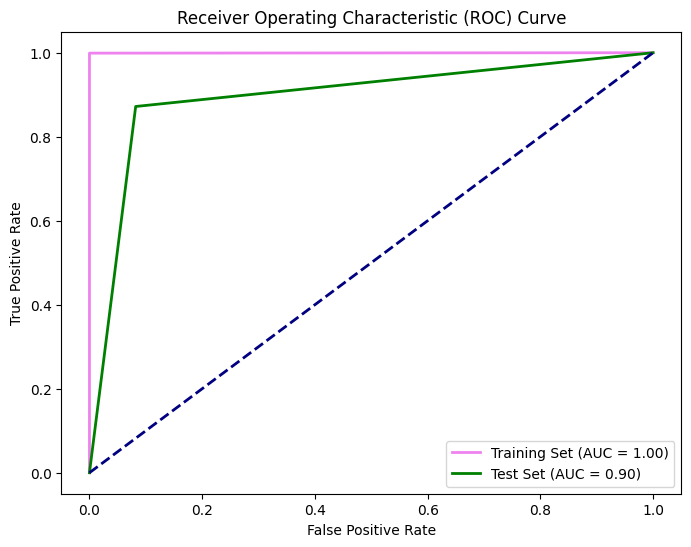

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Load training and testing data
X_train = np.loadtxt('/gisette_train.data')
y_train = np.loadtxt('/gisette_train.labels')
X_test = np.loadtxt('/gisette_valid.data')
y_test = np.loadtxt('/gisette_valid.labels')
# Augment the training and test data with a column of ones for w0
X_train_augmented = np.c_[np.ones(len(y_train)), X_train]
X_test_augmented = np.c_[np.ones(len(y_test)), X_test]
# Set lambda value
lambda_value = 0.0001
# Analytical solution for w and w0
w = np.linalg.inv(X_train_augmented.T @ X_train_augmented + lambda_value * np.identity(X_train_augmented.shape[1])) @ X_train_augmented.T @ y_train
w0 = np.mean(y_train - X_train_augmented @ w)
# Make predictions on training and test sets
y_train_pred = np.sign(X_train_augmented @ w + w0)
y_test_pred = np.sign(X_test_augmented @ w + w0)
# Calculate misclassification error
train_error = np.mean(y_train != y_train_pred)
test_error = np.mean(y_test != y_test_pred)
# Plot ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_pred)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_pred)
roc_auc_train = auc(fpr_train, tpr_train)
roc_auc_test = auc(fpr_test, tpr_test)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, color='violet', lw=2, label=f'Training Set (AUC = {roc_auc_train:.2f})')
plt.plot(fpr_test, tpr_test, color='green', lw=2, label=f'Test Set (AUC = {roc_auc_test:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()